In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

tf.random.set_seed(0)

2023-03-05 19:09:40.981652: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 19:09:41.443679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 19:09:41.443713: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 19:09:42.327050: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
california = fetch_california_housing(as_frame=True)
california.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=13)

In [6]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean.numpy())
    print(normalizer.variance.numpy())
    print(normalizer.count.numpy())

2023-03-05 19:09:43.948540: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 19:09:43.948567: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 19:09:43.948585: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thomas-Lenovo-V15-G2-ALC): /proc/driver/nvidia/version does not exist
2023-03-05 19:09:43.948803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[ 3.86e+00  2.87e+01  5.43e+00  1.10e+00  1.43e+03  3.10e+00  3.57e+01
  -1.20e+02]]
[[3.58e+00 1.58e+02 6.53e+00 2.43e-01 1.33e+06 1.34e+02 4.60e+00 4.04e+00]]
16512


In [7]:
model = keras.Sequential([normalizer, layers.Dense(32, activation='relu'), layers.Dense(1)])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 338
Trainable params: 321
Non-trainable params: 17
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1 )

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.8732 - val_loss: 0.6041
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.5108
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4761 - val_loss: 0.4779
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4562 - val_loss: 0.4689
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4434 - val_loss: 0.4595
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4365 - val_loss: 0.4458
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4294 - val_loss: 0.4424
Epoch 8/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4245 - val_loss: 0.4386
Epoch 9/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4192 - val_loss: 0.4356
Epoch 10/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4150 - val_lo

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,0.873228,0.604124,0
1,0.526682,0.510754,1
2,0.476056,0.477863,2
3,0.456244,0.468935,3
4,0.443409,0.459479,4
...,...,...,...
95,0.364120,0.385917,95
96,0.363340,0.386363,96
97,0.363013,0.382325,97
98,0.362817,0.384706,98


In [11]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

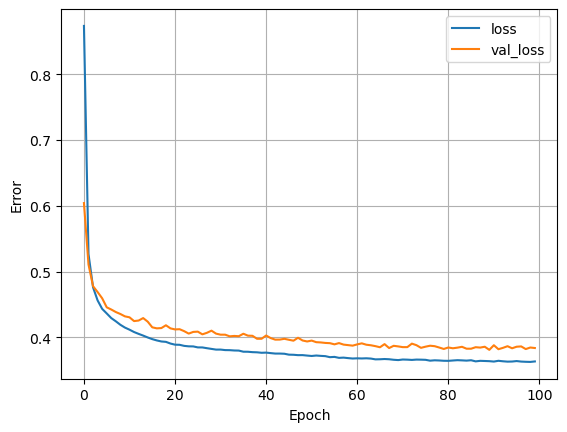

In [12]:
plot_loss(history)

In [13]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3794


0.3793664574623108

In [14]:
model = keras.Sequential([normalizer,
                          layers.Dense(64, activation='relu'),
                           layers.Dense(32, activation='relu'), 
                           layers.Dense(1)])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                576       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,706
Trainable params: 2,689
Non-trainable params: 17
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1 )

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6380 - val_loss: 0.4768
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4385 - val_loss: 0.4419
Epoch 3/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4196 - val_loss: 0.4342
Epoch 4/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4093 - val_loss: 0.4220
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4002 - val_loss: 0.4252
Epoch 6/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3935 - val_loss: 0.4063
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3882 - val_loss: 0.4016
Epoch 8/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3834 - val_loss: 0.3975
Epoch 9/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3790 - val_loss: 0.3956
Epoch 10/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3760 - val_lo

In [17]:
model.evaluate(X_test, y_test, verbose=0)

0.3372498154640198

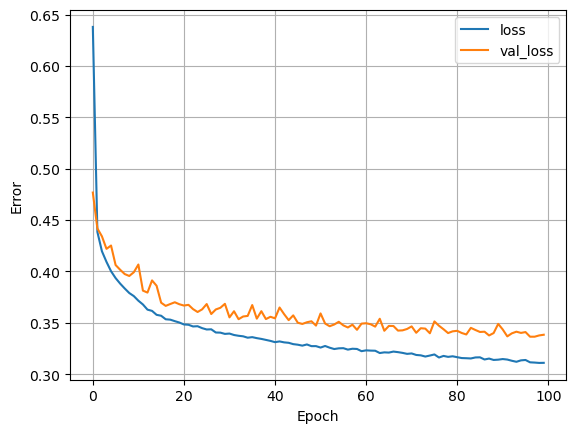

In [18]:
plot_loss(history)

In [19]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [20]:
model = keras.Sequential([normalizer,
                          layers.Dense(64, activation='relu'),
                           layers.Dense(32, activation='relu'), 
                           layers.Dense(1)])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [21]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1, callbacks=[early_stop] )

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6450 - val_loss: 0.4862
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4482 - val_loss: 0.4502
Epoch 3/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4261 - val_loss: 0.4371
Epoch 4/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4151 - val_loss: 0.4385
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4063 - val_loss: 0.4253
Epoch 6/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3985 - val_loss: 0.4142
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3918 - val_loss: 0.4053
Epoch 8/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3875 - val_loss: 0.3958
Epoch 9/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3798 - val_loss: 0.3928
Epoch 10/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3752 - val_lo

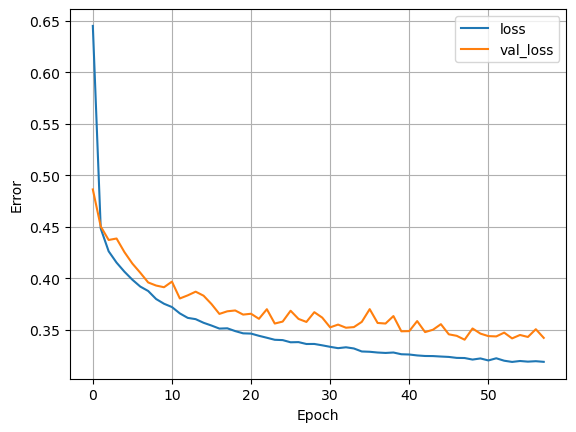

In [22]:
plot_loss(history)

In [23]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3449


0.3448728024959564

In [24]:
model = keras.Sequential([normalizer,
                          layers.Dense(128, activation='relu'),
                           layers.Dense(64, activation='relu'), 
                           layers.Dense(1)])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [25]:
model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1, callbacks=[early_stop] )

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5608 - val_loss: 0.4628
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4283 - val_loss: 0.4251
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4070 - val_loss: 0.4125
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3944 - val_loss: 0.4121
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3806 - val_loss: 0.3920
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3739 - val_loss: 0.3825
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3674 - val_loss: 0.3883
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3634 - val_loss: 0.3686
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3582 - val_loss: 0.3758
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3546 - val_lo

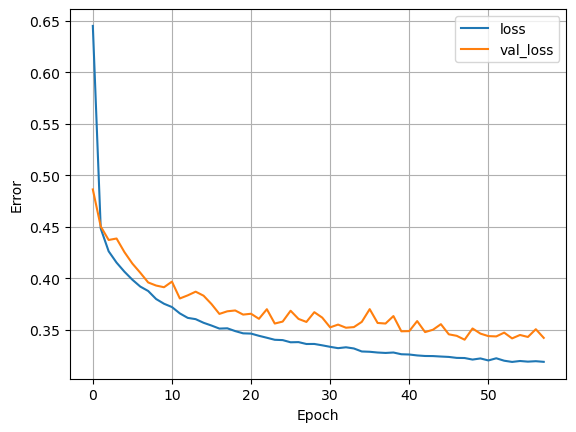

In [26]:
plot_loss(history)

In [27]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3394


0.3394424319267273

In [31]:
model = keras.Sequential([
        normalizer,
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

In [32]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1, callbacks=[early_stop] )

Epoch 1/100
413/413 [==============================] - 2s 3ms/step - loss: 0.5117 - val_loss: 0.4432
Epoch 2/100
413/413 [==============================] - 1s 3ms/step - loss: 0.4220 - val_loss: 0.4189
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3952 - val_loss: 0.3965
Epoch 4/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3839 - val_loss: 0.4014
Epoch 5/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3712 - val_loss: 0.3831
Epoch 6/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3630 - val_loss: 0.3889
Epoch 7/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3630 - val_loss: 0.3996
Epoch 8/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3585 - val_loss: 0.3604
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3510 - val_loss: 0.3643
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3459 - val_lo

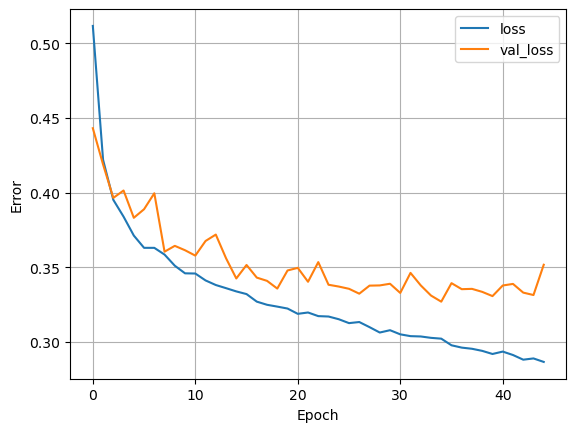

In [33]:
plot_loss(history)

In [34]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3461


0.3461279273033142

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_14 (Dense)            (None, 256)               2304      
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 43,538
Trainable params: 43,521
Non-trainable params: 17
_________________________________________________

In [36]:
model.count_params()

43538